In [1]:
import numpy as np
from sklearn.datasets import make_blobs


class KMeans():
    def __init__(self, k, max_iteration=10):
        self.k = k
        self.max_iteration = max_iteration
        self.all_centroids = []
        self.all_labels = []

  # Hàm thuật toán k-Means lấy đầu vào là một bộ dữ liệu và số lượng cluster k. Trẻ về tâm của k cụm
    def fit(self, dataSet):
        # Khởi tạo ngẫu nhiên k centroids
        numFeatures = dataSet.shape[1]
        centroids = self.get_random_centroids(numFeatures, self.k)
        self.all_centroids.append(centroids)
        self.all_labels.append(None)

        # Khởi tạo các biến iterations, oldCentroids
        iterations = 0
        oldCentroids = None

        # Vòng lặp cập nhật centroids trong thuật toán k-Means
        while not self.should_stop(oldCentroids, centroids, iterations):
            # Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
            oldCentroids = centroids
            iterations += 1

            # Gán nhãn cho mỗi diểm dữ liệu dựa vào centroids
            labels = self.get_labels(dataSet, centroids)
            self.all_labels.append(labels)

            # Cập nhật centroids dựa vào nhãn dữ liệu
            # print('0ld centroids: ', centroids)
            centroids = self.get_centroids(dataSet, labels, self.k)
            # print('new centroids: ', centroids)
            self.all_centroids.append(centroids)

        return centroids

    # Hàm khởi tạo centroids ngẫu nhiên
    def get_random_centroids(self, numFeatures, k):
        return np.random.rand(k, numFeatures)
        # return np.array([[-5., -5.],
        #                  [4., 6.]])

    # Hàm này trả về nhãn cho mỗi điểm dữ liệu trong datasets
    def get_labels(self, dataSet, centroids):
        # Với mỗi quan sát trong dataset, lựa chọn centroids gần nhất để gán label cho dữ liệu.
        labels = []
        for x in dataSet:
            # Tính khoảng cách tới các centroids và cập nhận nhãn
            distances = np.sum((x-centroids)**2, axis=1)
            label = np.argmin(distances)
            labels.append(label)
        return labels
      
  # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
  # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
    def should_stop(self, oldCentroids, centroids, iterations):
        if iterations > self.max_iteration: 
            return True
        return np.all(oldCentroids == centroids)

    # Trả về toan độ mới cho k centroids của mỗi chiều.
    def get_centroids(self, dataSet, labels, k):
        centroids = []
        for j in np.arange(k):
            # Lấy index cho mỗi centroids
            idx_j = np.where(np.array(labels) == j)[0]
            centroid_j = dataSet[idx_j, :].mean(axis=0)
            centroids.append(centroid_j)
        return np.array(centroids)

In [51]:
dataset, _ = make_blobs(centers = 4, n_samples=800, cluster_std=2.5,random_state=10)

kmean = KMeans(k=4, max_iteration=15)
centroids = kmean.fit(dataset)

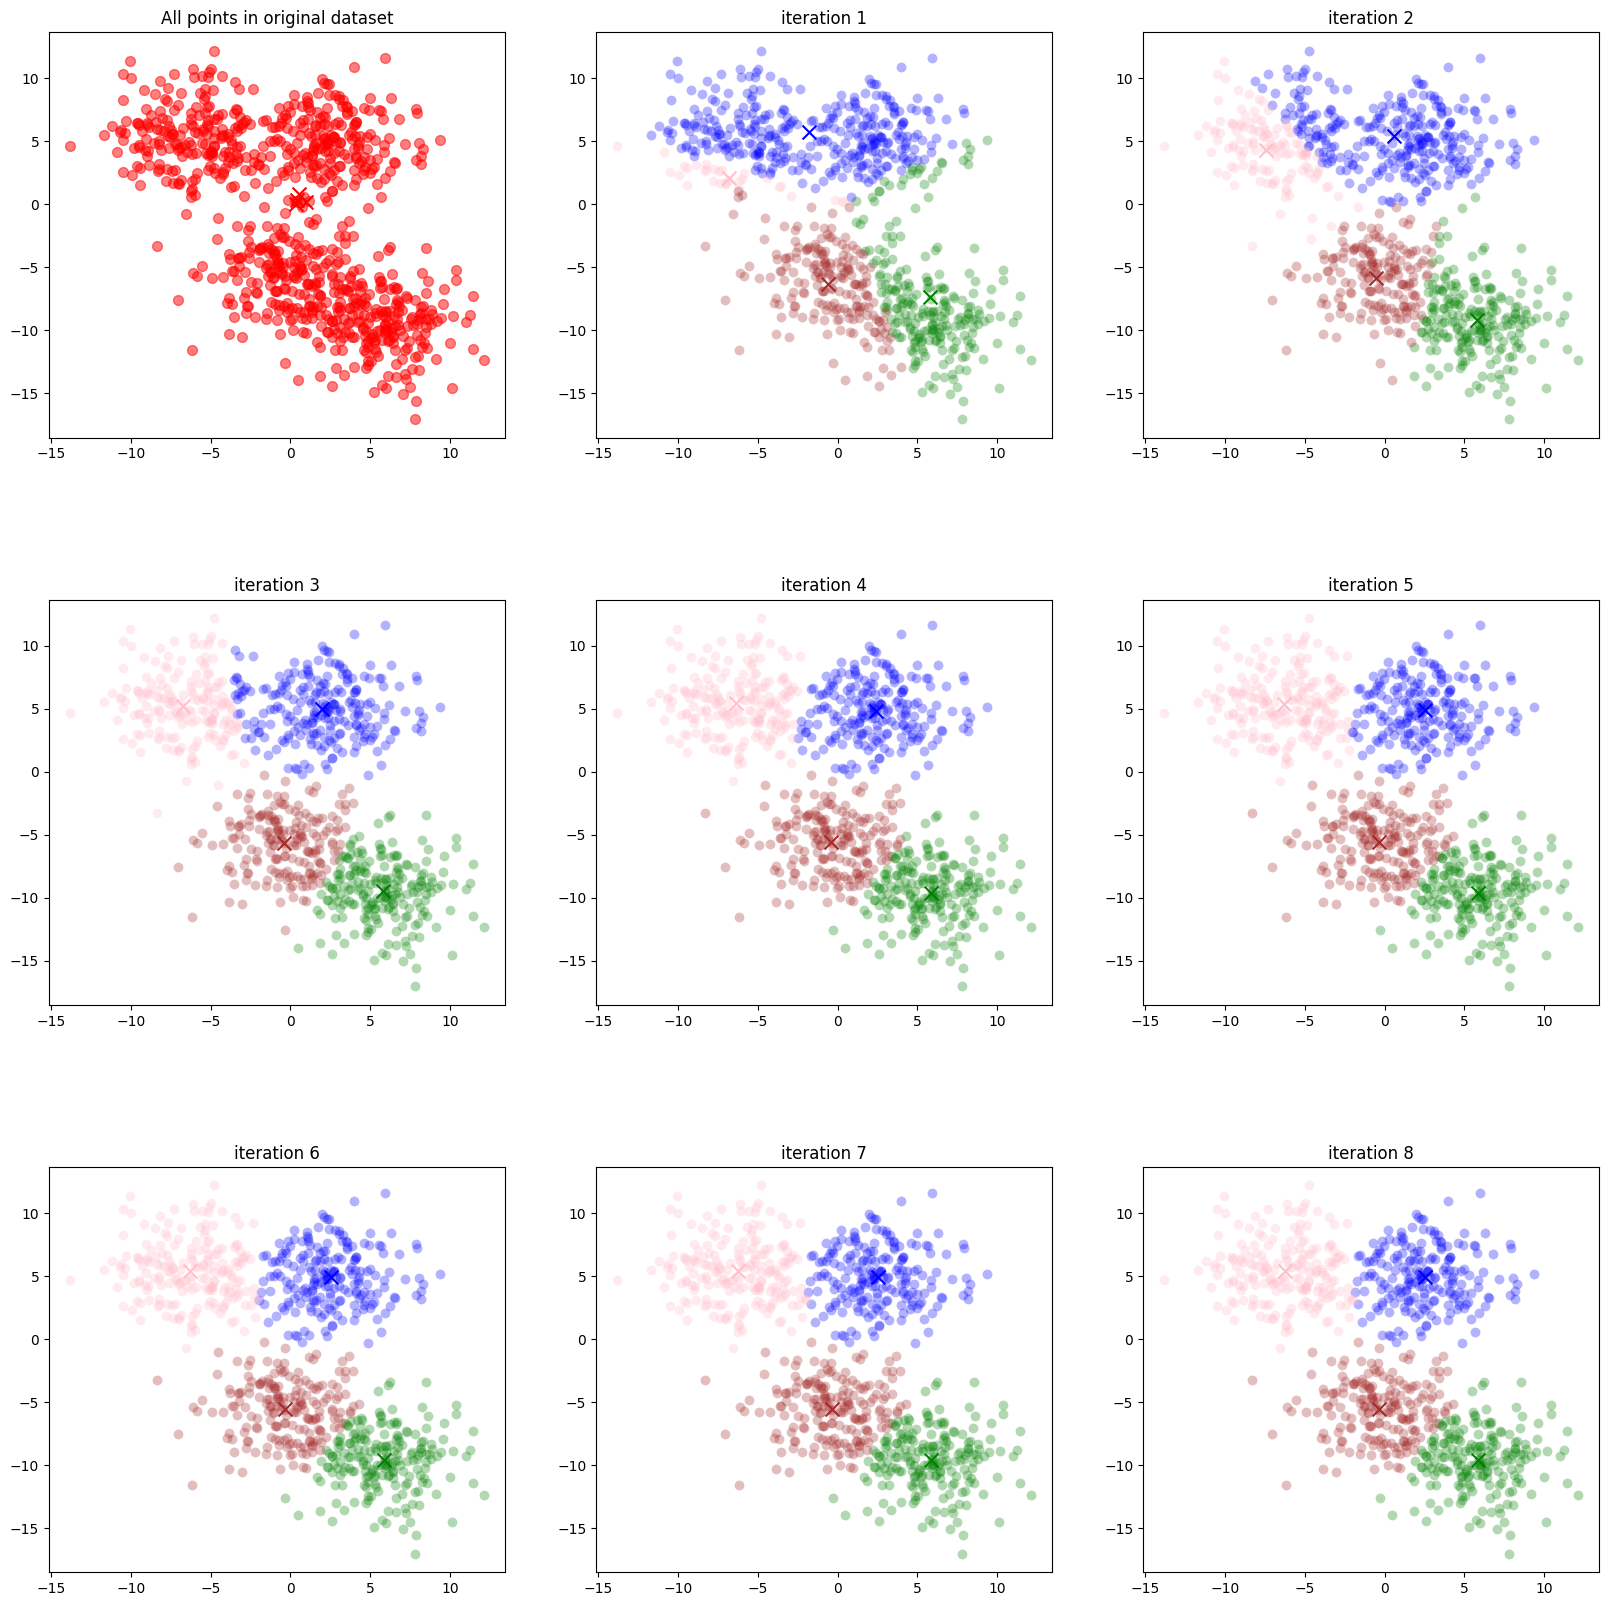

In [52]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = ['green', 'blue', 'pink', 'brown']
labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

for i in np.arange(len(kmean.all_centroids)):
    ax = plt.subplot(gs[i])
    if i == 0:
        centroids_i = kmean.all_centroids[i]
        plt.scatter(dataset[:, 0], dataset[:, 1], s=50, alpha=0.5, color='red')
        for j in np.arange(kmean.k):
            plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
        plt.title('All points in original dataset')
    else:
        # Lấy centroids và labels tại bước thứ i
        centroids_i = kmean.all_centroids[i]
        labels_i = kmean.all_labels[i]
        # Visualize các điểm cho từng cụm
        for j in np.arange(kmean.k):
            idx_j = np.where(np.array(labels_i) == j)[0]
            plt.scatter(dataset[idx_j, 0], dataset[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
            plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color=colors[j], s=100, label=labels[j])
        plt.title(r'iteration {}'.format(i))

# sklearn kmean 

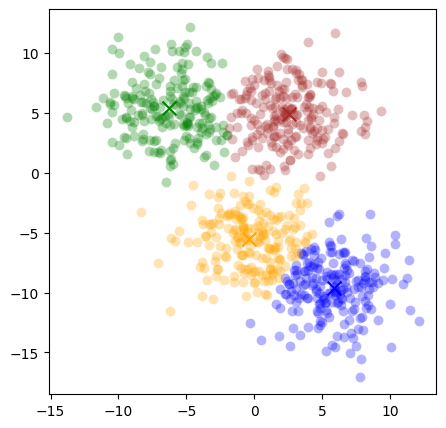

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmean_model = KMeans(n_clusters=4, n_init = 10).fit(dataset)

plt.figure(figsize = (5, 5))
colors = ['green', 'blue', 'brown', 'orange']
for i in range(len(kmean_model.cluster_centers_)):
    idx_i = (kmean_model.labels_ == i)
    plt.scatter(dataset[idx_i, 0], dataset[idx_i, 1], 
                color=colors[i], label=i, s=50, alpha=0.3, lw = 0)
    plt.scatter(kmean_model.cluster_centers_[i, 0], 
                kmean_model.cluster_centers_[i, 1], 
                marker='x', color=colors[i], s=100, label=i)

# Elbow trong lựa chọn số cụm

In [65]:
from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(1, K):
    # 1.  Huấn luyện với số cụm = i
    kmeans_i = KMeans(n_clusters=i, n_init = 10).fit(dataset)
    # 2. Tính _hàm biến dạng_
    # 2.1. Khoảng cách tới toàn bộ centroids
    d2centroids = cdist(dataset, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
    # 2.2. Khoảng cách tới centroid gần nhất
    min_distance = np.min(d2centroids, axis=1) # shape (n)
    loss = np.sum(min_distance)
    losses.append(loss)

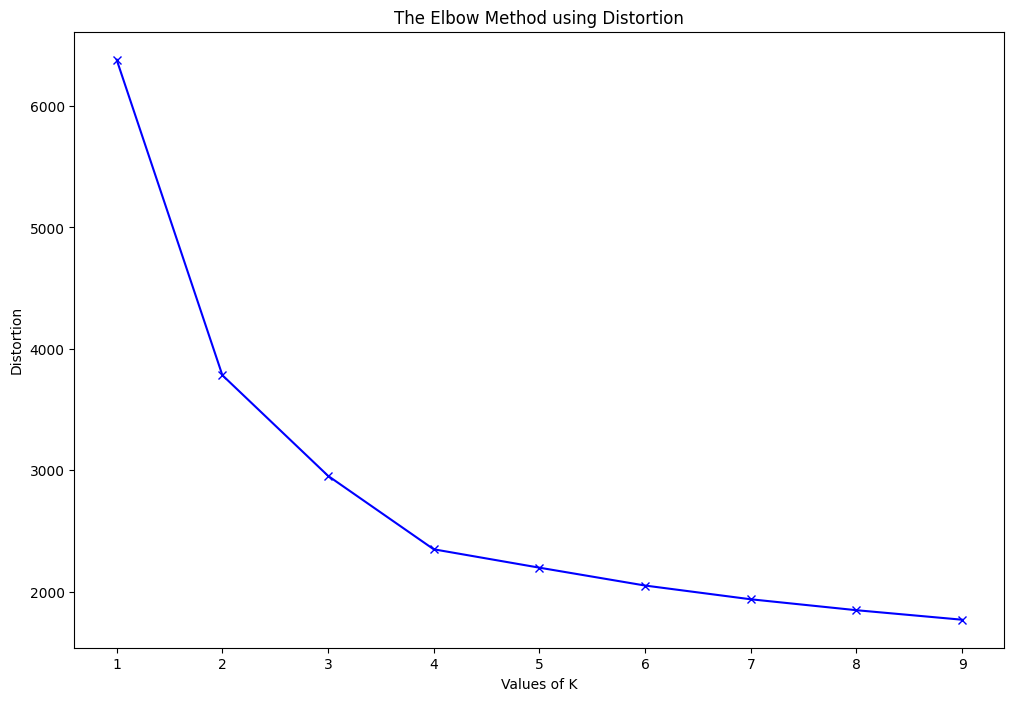

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Select K = 4 because if increasing K from 4 to 5 then slope is smaller than K from 3 to 4 

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Khởi tạo dữ liệu một cách ngẫu nhiên
X, _ = make_blobs(n_samples=600, centers=3, 
                        n_features=4, cluster_std=3.0,
                        random_state=123)

# Hồi qui mô hình với 2 cụm
kmean = KMeans(n_clusters=3, n_init = 10)
centroids = kmean.fit(X)

# Dự báo nhãn cho các cụm trên tập X
labels = kmean.predict(X)

In [3]:
from sklearn.manifold import TSNE
import time

time_start = time.time()

# Biến đổi dữ liệu về 2 chiều
X_tsne = TSNE(n_components=2, random_state=123).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.9349632263183594 seconds


/var/folders/9d/pfp2nf6n3b99spfw7yv6nrt80000gn/T/ipykernel_32621/2866723736.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])


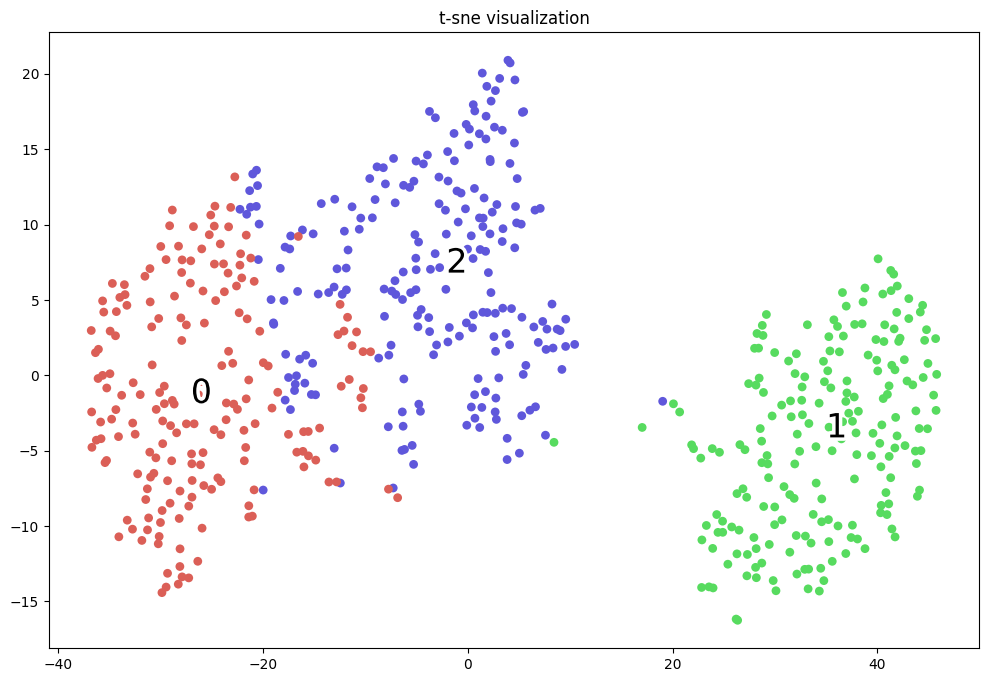

In [7]:
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    # plt.xlim(-25, 25)
    # plt.ylim(-25, 25)

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(X_tsne, labels)